<a href="https://colab.research.google.com/github/SarahFSBorges/data.science/blob/main/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# instalar wordcloud 
!pip install wordcloud -q

In [9]:

# importar os pacotes necessários
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# importar o arquivo csv em um df
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2022-09-07/data/listings.csv.gz")

# primeiras 5 entradas
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27640141,https://www.airbnb.com/rooms/27640141,20220907151536,2022-09-07,city scrape,Fibre internet*Monthly Discount*Character House,Monthly and longer stays welcome! New desk & o...,Within one block walking you will be on Bloor ...,https://a0.muscache.com/pictures/89a05e34-3549...,2343887,...,4.89,4.89,4.77,NaN,f,2,2,0,0,0.95
1,27826009,https://www.airbnb.com/rooms/27826009,20220907151536,2022-09-08,previous scrape,Downtown condo,Welcome to the heart of the city! Located in t...,It is a beautiful neighbourhood filled with up...,https://a0.muscache.com/pictures/6e7c51ed-320d...,17410774,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.04
2,27647117,https://www.airbnb.com/rooms/27647117,20220907151536,2022-09-08,previous scrape,Cozy studio in an amazing neighbourhood!,The studio apartment is in Greek Town on The D...,NaN,https://a0.muscache.com/pictures/c3a558bd-0918...,96809956,...,5.00,5.00,4.75,NaN,f,1,1,0,0,0.08
3,27647509,https://www.airbnb.com/rooms/27647509,20220907151536,2022-09-08,previous scrape,Dundas west subway station apartment BEST LOCA...,It is a two bedrooms apartment on the ground f...,Familiar building,https://a0.muscache.com/pictures/81f1eb2f-9a0b...,179249078,...,4.88,5.00,4.75,NaN,t,1,0,1,0,0.19
4,27653375,https://www.airbnb.com/rooms/27653375,20220907151536,2022-09-08,city scrape,Exquisite 1200 sqft 3BR + Den in core-downtown,Exquisite 1200 sqft 3 Bedroom + Den Condo in c...,The building is connected indoors via the PATH...,https://a0.muscache.com/pictures/073dc44e-a9a5...,135718015,...,5.00,4.85,4.85,STR-2204-HLPVHK,f,37,37,0,0,0.42


In [12]:
# exemplos de descrições para os imóveis no Airbnb
display(summary.iloc[100])
display(summary.iloc[120])
display(summary.iloc[133])

'Ambiente tranquilo e familiar,ótimo para viajantes que no final do dia queiram descansar e ter uma noite tranquila. Excelente bairro que fica próximo a Lagoa Rodrigo de Freitas, que é um dos lindos cartões postais de nossa cidade. Aguardo você!'

'O quarto é lindo e bem grande e possui acesso para a varanda do apartamento. Possui grandes armários,  bancada. Esse é o quarto maior de um apartamento/cobertura de 150m2 que possui 3 quartos, sala, varandas em torno de todo o apartamento, cozinha ampla com dependências. Esse quarto não possui banheiro privativo. Os hospedes desse quarto compartilham o banheiro com as pessoas que estiverem utilizando o segundo quarto. O terceiro quarto é a suíte que normalmente é utilizada por mim e meu marido.'

'Aconchegante, amplo, básico, arejado, iluminado com luz natural em prédio seguro e familiar. Prédio com portaria 24 horas e cameras de segurança em todos os andares do edifício. Tudo isto em Copacabana a quase 1 quadra do mar! É o segundo prédio da segunda quadra da praia!!! Está localizado na Av. Prado Junior quase esquina com Av. N.Sra de Copacabana!'

In [13]:
# concatenar as palavras
all_summary = " ".join(s for s in summary)

# ver quantidade de palavras
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 9823645


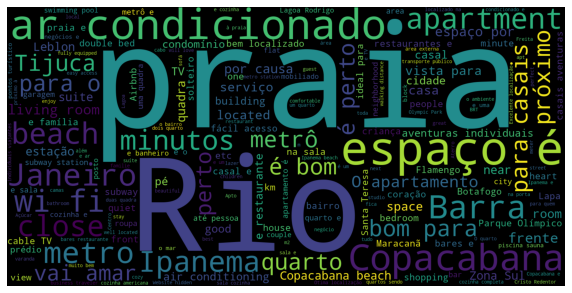

In [88]:
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "place", "cama", "lado", "minuto", "min", "todo", "todos"])

# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);
wordcloud.to_file("airbnb_summary_wordcloud.png")

# **Criar uma wordcloud sobre uma imagem**







In [75]:
!pip install requests
import requests
response = requests.get( 'https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.gratispng.com%2Fpng-yyybfu%2F&psig=AOvVaw3mQ5a47bRcZF0cqMTKNmlD&ust=1670716195983000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCLCus_3c7fsCFQAAAAAdAAAAABAR' ) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


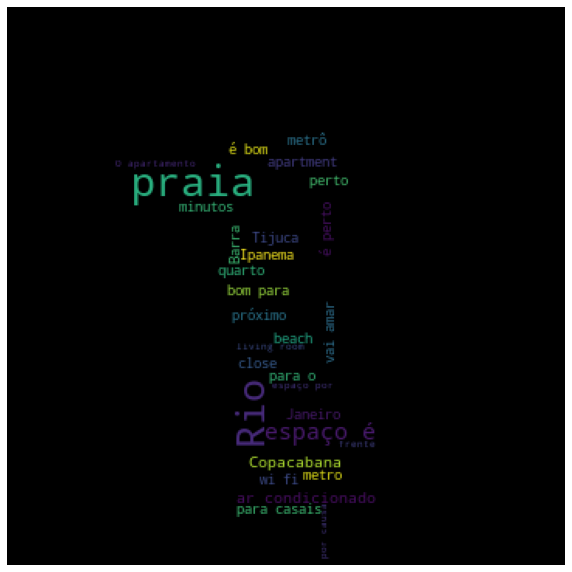

In [90]:
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=25,
                      mask= rio_mask, max_font_size=500,
                      min_font_size=1).generate(all_summary)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,15))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")